In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\bkhan\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv("Employees Promotion.csv")    # loading employee promotion.csv data from day09-project s3 bucket.
df.head()

,EmployeeID,Department,Region_Employment,Education Level,Gender,Recruitment Channel,NO_Trainings_LstYear,Age,previous_year_rating,Service Length,Awards,Avg_Training_Score,Is Promoted
0,65438,Sales & Marketing,7,Master's & above,f,sourcing,1,35.0,5.0,8,NO,49.0,NO
1,65141,Operations,22,Bachelor's,m,other,1,30.0,5.0,4,NO,60.0,NO
2,7513,Sales & Marketing,19,Bachelor's,m,sourcing,1,34.0,3.0,7,NO,50.0,NO
3,2542,Sales & Marketing,23,Bachelor's,m,other,2,39.0,1.0,10,NO,50.0,NO
4,48945,Technology,26,Bachelor's,m,other,1,45.0,3.0,2,NO,73.0,NO


### Analysing Data

In [4]:
df.info()   # checking data types, dimensions of df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   EmployeeID            54808 non-null  int64  
 1   Department            54808 non-null  object 
 2   Region_Employment     54808 non-null  int64  
 3   Education Level       52399 non-null  object 
 4   Gender                54808 non-null  object 
 5   Recruitment Channel   44404 non-null  object 
 6   NO_Trainings_LstYear  54808 non-null  int64  
 7   Age                   54268 non-null  float64
 8   previous_year_rating  50684 non-null  float64
 9   Service Length        54808 non-null  int64  
 10  Awards                54808 non-null  object 
 11  Avg_Training_Score    52248 non-null  float64
 12  Is Promoted           54808 non-null  object 
dtypes: float64(3), int64(4), object(6)
memory usage: 5.4+ MB


In [5]:
df.describe()    # stats of the df

,EmployeeID,Region_Employment,NO_Trainings_LstYear,Age,previous_year_rating,Service Length,Avg_Training_Score
count,54808.000000,54808.000000,54808.000000,54268.000000,50684.000000,54808.000000,52248.000000
mean,39195.830627,14.195045,1.253011,34.586644,3.329256,5.865512,63.712238
std,22586.581449,10.086273,0.609264,8.114136,1.259993,4.265094,13.521910
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,39.000000
25%,19669.750000,4.000000,1.000000,29.000000,3.000000,3.000000,51.000000
50%,39225.500000,13.000000,1.000000,33.000000,3.000000,5.000000,60.000000
75%,58730.500000,22.000000,1.000000,39.000000,4.000000,7.000000,77.000000
max,78298.000000,34.000000,10.000000,60.000000,5.000000,37.000000,99.000000


In [6]:
df.shape    # dimesnsions of the df

(54808, 13)

In [7]:
df.duplicated().sum()    # checking any duplicated values in the df

0

In [8]:
df.isnull().sum()    # checking total null values in each column

EmployeeID                  0
Department                  0
Region_Employment           0
Education Level          2409
Gender                      0
Recruitment Channel     10404
NO_Trainings_LstYear        0
Age                       540
previous_year_rating     4124
Service Length              0
Awards                      0
Avg_Training_Score       2560
Is Promoted                 0
dtype: int64

In [9]:
df['Is Promoted'].value_counts()    # target column value counts

NO     50140
YES     4668
Name: Is Promoted, dtype: int64

### Cleaning and Engineering data

In [10]:
df['Is Promoted'] = df['Is Promoted'].map({'YES': 1, 'NO': 0})    # mapping the target column values i.e. Yes and No to 1 and 0.

In [11]:
df['Education Level'].unique()    # unique values of Education Level column

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

In [12]:
df['Education Level'].value_counts()    # Value counts of each values in the Education Level column.

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: Education Level, dtype: int64

In [13]:
df['Education Level'].isnull().sum()    # total null values in Education Level column

2409

In [14]:
df['Education Level'].fillna(method='ffill', inplace=True)    # using forward fill to fill null values

In [15]:
df['Education Level'].value_counts()    # now checking the count

Bachelor's          38390
Master's & above    15579
Below Secondary       839
Name: Education Level, dtype: int64

In [16]:
df['Education Level'].isnull().sum()    # checking null values

0

In [17]:
df.Age.unique()    # unique values of age column

array([35., 30., 34., 39., 45., 31., 33., 28., 32., 49., 37., 38., 41.,
       27., 29., 26., 24., 57., 40., 42., 23., 59., nan, 50., 56., 20.,
       25., 47., 36., 46., 44., 60.,  0., 43., 22., 54., 58., 48., 53.,
       55., 51., 52., 21.])

In [18]:
df.Age.value_counts()    # value counts of age column

30.0    3597
32.0    3479
31.0    3474
29.0    3352
33.0    3157
28.0    3103
34.0    3017
27.0    2784
35.0    2673
36.0    2482
37.0    2134
26.0    2019
38.0    1894
39.0    1660
40.0    1634
25.0    1283
41.0    1265
42.0    1133
43.0     978
44.0     834
24.0     832
45.0     749
46.0     686
48.0     554
47.0     550
50.0     516
49.0     435
23.0     419
51.0     386
53.0     354
52.0     345
0.0      340
54.0     306
55.0     285
56.0     262
57.0     234
22.0     228
60.0     214
58.0     211
59.0     202
20.0     110
21.0      98
Name: Age, dtype: int64

In [19]:
df.Age.fillna(df['Age'].median())    # filling the null values of age column using median of age column

0        35.0
1        30.0
2        34.0
3        39.0
4        45.0
         ... 
54803    48.0
54804    37.0
54805     0.0
54806    29.0
54807    27.0
Name: Age, Length: 54808, dtype: float64

In [20]:
df.previous_year_rating.unique()    # unique values of previous_year_rating column

array([ 5.,  3.,  1.,  4., nan,  2.])

In [21]:
df.previous_year_rating.value_counts()    # value counts of previous_year_rating col

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

In [22]:
df.previous_year_rating.fillna(df.previous_year_rating.median())    # filling previous_year_rating col using its median

0        5.0
1        5.0
2        3.0
3        1.0
4        3.0
        ... 
54803    3.0
54804    2.0
54805    5.0
54806    1.0
54807    1.0
Name: previous_year_rating, Length: 54808, dtype: float64

In [23]:
df.Avg_Training_Score.unique()   # unique values of Avg_Training_Score col

array([49., 60., 50., 73., 85., 59., 63., 83., 54., 77., 80., 84., 51.,
       46., 75., 57., 70., 68., 79., 44., 72., nan, 48., 58., 87., 47.,
       52., 88., 71., 65., 62., 53., 78., 91., 82., 69., 55., 74., 86.,
       90., 92., 67., 89., 56., 76., 81., 64., 39., 94., 93., 66., 95.,
       42., 96., 40., 99., 43., 97., 41., 98.])

In [24]:
df.Avg_Training_Score.value_counts()   # value counts of Avg_Training_Score col

50.0    2716
49.0    2681
48.0    2437
51.0    2347
60.0    2155
59.0    2064
58.0    1898
52.0    1856
47.0    1746
62.0    1450
82.0    1447
57.0    1437
81.0    1357
53.0    1324
80.0    1206
83.0    1198
84.0    1168
79.0    1160
46.0    1136
85.0    1072
56.0    1070
70.0    1055
63.0    1021
69.0    1018
54.0     997
68.0     935
78.0     933
86.0     912
71.0     898
55.0     872
67.0     728
72.0     725
64.0     708
77.0     697
87.0     655
65.0     599
66.0     580
73.0     523
76.0     516
88.0     444
74.0     433
75.0     403
44.0     335
89.0     301
90.0     185
43.0     176
91.0     117
92.0      99
93.0      84
94.0      65
42.0      62
97.0      49
96.0      48
95.0      45
98.0      37
99.0      35
41.0      26
40.0       5
39.0       2
Name: Avg_Training_Score, dtype: int64

In [25]:
df.Avg_Training_Score.fillna(df.Avg_Training_Score.median())    # filling null values using Avg_Training_Score median values

0        49.0
1        60.0
2        50.0
3        50.0
4        73.0
         ... 
54803    78.0
54804    56.0
54805    79.0
54806    60.0
54807    49.0
Name: Avg_Training_Score, Length: 54808, dtype: float64

In [26]:
df = df.drop(['EmployeeID', 'Gender', 'Service Length', 'Recruitment Channel'], axis=1)    # dropping these four columns

In [27]:
df.head()

,Department,Region_Employment,Education Level,NO_Trainings_LstYear,Age,previous_year_rating,Awards,Avg_Training_Score,Is Promoted
0,Sales & Marketing,7,Master's & above,1,35.0,5.0,NO,49.0,0
1,Operations,22,Bachelor's,1,30.0,5.0,NO,60.0,0
2,Sales & Marketing,19,Bachelor's,1,34.0,3.0,NO,50.0,0
3,Sales & Marketing,23,Bachelor's,2,39.0,1.0,NO,50.0,0
4,Technology,26,Bachelor's,1,45.0,3.0,NO,73.0,0


In [28]:
df.duplicated().sum()    # checking total duolicate values

5013

In [29]:
df.drop_duplicates(keep='first', inplace=True)    # dropping duplicates whuile keeping its first value

In [30]:
df.duplicated().sum()

0

In [31]:
df['Is Promoted'].value_counts()

0    45175
1     4620
Name: Is Promoted, dtype: int64

<AxesSubplot:xlabel='Is Promoted', ylabel='count'>

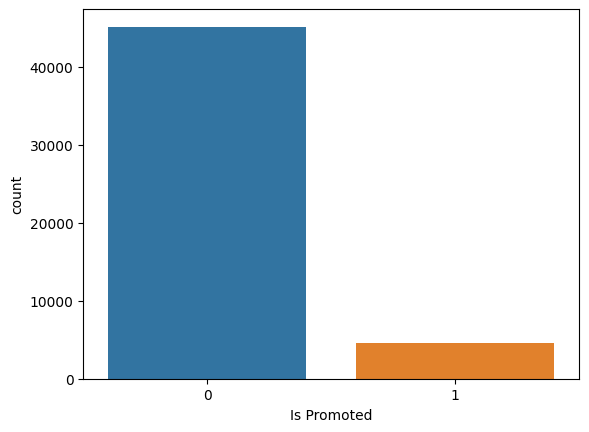

In [32]:
sns.countplot(x=df['Is Promoted'], data=df)    # countplot of target variable

In [33]:
df = pd.get_dummies(df, columns=['Department', 'Education Level', 'Awards'])    # getting dummies data of these columns


In [34]:
df.head()

,Region_Employment,NO_Trainings_LstYear,Age,previous_year_rating,Avg_Training_Score,Is Promoted,Department_-,Department_Analytics,Department_Finance,Department_HR,...,Department_Operations,Department_Procurement,Department_R&D,Department_Sales & Marketing,Department_Technology,Education Level_Bachelor's,Education Level_Below Secondary,Education Level_Master's & above,Awards_NO,Awards_YES
0,7,1,35.0,5.0,49.0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
1,22,1,30.0,5.0,60.0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
2,19,1,34.0,3.0,50.0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
3,23,2,39.0,1.0,50.0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
4,26,1,45.0,3.0,73.0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0


In [34]:
import os
import boto3
import re
import sagemaker

role = sagemaker.get_execution_role()   # execution role
region = boto3.Session().region_name    # region name
smclient = boto3.Session().client("sagemaker")    # setting sagemaker session 
bucket = "day09-project1"
prefix = ("sagemaker/Employess-Promotion") # place to upload training files within the bucket
print (region)

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml
us-east-1


### Training

In [38]:
# splitting df into train, validation and test data in 70%, 20% and 10% respectively.
train_data, validation_data, test_data = np.split(df.sample(frac=1, random_state=1729),[int(0.7 * len(df)), int(0.9 * len(df))])

pd.concat([train_data["Is Promoted"], train_data.drop("Is Promoted", axis=1)], axis=1).to_csv("train.csv", index=False, header=False)  
pd.concat([validation_data["Is Promoted"], validation_data.drop("Is Promoted", axis=1)], axis=1).to_csv("validation.csv", index=False, header=False)
pd.concat([test_data["Is Promoted"], test_data.drop("Is Promoted", axis=1)], axis=1).to_csv("test.csv", index=False, header=False)

In [36]:
# storing test and train data
train_y = train_data["Is Promoted"]
train_X = train_data.drop("Is Promoted", axis=1)
test_y = test_data["Is Promoted"]
test_X = test_data.drop("Is Promoted", axis=1)


In [37]:
# uploading train and validation in s3 bucket
boto3.Session().resource("s3").Bucket(bucket).Object(
 os.path.join(prefix, "train/train.csv")
).upload_file("train.csv")
boto3.Session().resource("s3").Bucket(bucket).Object(
 os.path.join(prefix, "validation/validation.csv")
).upload_file("validation.csv")

### HP Tuning

ParameterRanges: Specifies the search space for hyperparameters.
* CategoricalParameterRanges: Categorical hyperparameters are those whose values come from a discrete set of categories or options.(none in this example).
* ContinuousParameterRanges: Continuous hyperparameters are those that can take any real value within a specified range:
* eta: Learning rate with a range between 0 and 1.
* min_child_weight: Minimum sum of instance weight (hessian) needed in a child.
* alpha: L1 regularization term with a range between 0 and 2.
* IntegerParameterRanges: For integer-valued hyperparameters.
* max_depth: Maximum depth of a tree with a range between 1 and 10.

ResourceLimits: Specifies resource limits for the tuning job.
* MaxNumberOfTrainingJobs: Maximum number of training jobs to run during the tuning job.
* MaxParallelTrainingJobs: Maximum number of training jobs to run in parallel.

Strategy: Specifies the tuning strategy. In this case, it's set to "Bayesian".

HyperParameterTuningJobObjective: Specifies the objective metric to optimize and whether to minimize or maximize it.

MetricName: Name of the metric to optimize, set to "validation:accuracy" (The ratio of correctly predicted instances to the total instances).
Type: Set to "Maximize" since we want to maximize the accuracy.

In [38]:
from time import gmtime, strftime, sleep

tuning_job_name = "xgboost-tuningjob-" + strftime("%d-%H-%M-%S", gmtime())   # generating unique hyperaparameter tuning job name
print(tuning_job_name)

# configuration for the hyperparameter tuning job
tuning_job_config = {
    "ParameterRanges": {
        "CategoricalParameterRanges": [],
        "ContinuousParameterRanges": [
            {
                "MaxValue": "1",
                "MinValue": "0",
                "Name": "eta",      # Learning rate parameter
            },
            {
                "MaxValue": "10",
                "MinValue": "1",
                "Name": "min_child_weight",    # Minimum sum of instance weight in a child
            },
            {
                "MaxValue": "2",
                "MinValue": "0",
                "Name": "alpha",    # # L1 regularization term
            },
        ],
        "IntegerParameterRanges": [
            {
                "MaxValue": "10",
                "MinValue": "1",
                "Name": "max_depth",    # Maximum depth of a tree
            }
        ],
    },
    "ResourceLimits": {"MaxNumberOfTrainingJobs": 10, "MaxParallelTrainingJobs": 3},
    "Strategy": "Bayesian",
    "HyperParameterTuningJobObjective": {"MetricName": "validation:accuracy", "Type": "Maximize"},
}

xgboost-tuningjob-26-21-56-00


The following block includes details about the algorithm, input data configuration, output data configuration, resource configuration, role ARN, hyperparameters, and stopping conditions.
* The AlgorithmSpecification section specifies the training image and input mode.
* The InputDataConfig section specifies details about the training and validation datasets, including S3 paths.
* The OutputDataConfig section specifies the S3 path where the output model artifacts will be stored.
* The ResourceConfig section specifies the instance count, instance type, and volume size.
* The StaticHyperParameters section specifies static hyperparameters for the XGBoost algorithm.
* The StoppingCondition section specifies the maximum runtime for the training job.

Static hyperparamters:
* eval_metric: Specifies the evaluation metric to be used for model performance assessment during training. In this case, the chosen evaluation metric is Area Under the Curve (AUC) for the Receiver Operating Characteristic (ROC) curve. Since it is a common metric for binary classification problems and represents the area under the ROC curve, which measures the model's ability to distinguish between positive and negative examples.
* num_round: Specifies the number of boosting rounds (iterations) for the XGBoost algorithm. This parameter determines the number of boosting rounds (iterations) during the training process. A higher number of rounds can potentially lead to a more accurate model, but it's important to monitor for overfitting.
* objective: Specifies the learning task and corresponding objective function. This parameter indicates that the training task is binary classification, and the objective function to be optimized is the logistic loss. Since the logistic loss is suitable for binary classification problems, and optimizing it leads to the logistic regression model.
* rate_drop: Specifies the rate at which the algorithm drops trees during the dropout process. Dropout is a regularization technique used to prevent overfitting. This parameter controls the fraction of previously dropped trees to be dropped during a training iteration. A value of 0.3 means that 30% of the trees are dropped during each iteration.
* tweedie_variance_power: Specifies the power for the variance function in the Tweedie distribution. This parameter is relevant when the objective function is set to Tweedie, which is used for modeling non-negative continuous target variables with a variance function. The specified value of 1.4 determines the power parameter for the Tweedie distribution's variance function.

In [39]:
from sagemaker.image_uris import retrieve

training_image = retrieve(framework="xgboost", region=region, version="1.5-1")    # Retrieving the URI of the pre-built Docker image for XGBoost

# S3 input paths for training and validation data
s3_input_train = "s3://{}/{}/train".format(bucket, prefix)
s3_input_validation = "s3://{}/{}/validation/".format(bucket, prefix)

# configuration for the SageMaker training job
training_job_definition = {
    "AlgorithmSpecification": {"TrainingImage": training_image, "TrainingInputMode": "File"},    # algorithm and its training image
    "InputDataConfig": [    # input data configuration for training and validation
        {
            "ChannelName": "train",    # Channel name for training data
            "CompressionType": "None",
            "ContentType": "csv",
            "DataSource": {
                "S3DataSource": {
                    "S3DataDistributionType": "FullyReplicated",
                    "S3DataType": "S3Prefix",
                    "S3Uri": s3_input_train,    # S3 path for training data
                }
            },
        },
        {
            "ChannelName": "validation",    # Channel name for validation data
            "CompressionType": "None",
            "ContentType": "csv",
            "DataSource": {
                "S3DataSource": {
                    "S3DataDistributionType": "FullyReplicated",
                    "S3DataType": "S3Prefix",
                    "S3Uri": s3_input_validation,   # S3 path for validation data
                }
            },
        },
    ],
    "OutputDataConfig": {"S3OutputPath": "s3://{}/{}/output".format(bucket, prefix)},    # output data configuration for storing model artifacts
    "ResourceConfig": {"InstanceCount": 1, "InstanceType": "ml.m4.xlarge", "VolumeSizeInGB": 10},    # resource configuration for training instances
    "RoleArn": role,   # IAM role 
    "StaticHyperParameters": {    # static hyperparameters for the XGBoost algorithm
        "eval_metric": "auc",
        "num_round": "100",
        "objective": "binary:logistic",
        "rate_drop": "0.3",
        "tweedie_variance_power": "1.4",
    },
    "StoppingCondition": {"MaxRuntimeInSeconds": 43200},    #  stopping conditions for the training job
}

In [40]:
# creating the hyperparameter tuning job
smclient.create_hyper_parameter_tuning_job(
    HyperParameterTuningJobName=tuning_job_name,
    HyperParameterTuningJobConfig=tuning_job_config,
    TrainingJobDefinition=training_job_definition,
)

{'HyperParameterTuningJobArn': 'arn:aws:sagemaker:us-east-1:585522057818:hyper-parameter-tuning-job/xgboost-tuningjob-26-21-56-00',
 'ResponseMetadata': {'RequestId': '4764dc56-9e64-411d-b17d-851601b8cfa7',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': '4764dc56-9e64-411d-b17d-851601b8cfa7',
   'content-type': 'application/x-amz-json-1.1',
   'content-length': '130',
   'date': 'Sun, 26 Nov 2023 21:56:04 GMT'},
  'RetryAttempts': 0}}

In [41]:
# status of hp
smclient.describe_hyper_parameter_tuning_job(HyperParameterTuningJobName=tuning_job_name)["HyperParameterTuningJobStatus"]

'InProgress'

In [42]:
# Job name of hp
smclient.describe_hyper_parameter_tuning_job(HyperParameterTuningJobName=tuning_job_name)['HyperParameterTuningJobName']

'xgboost-tuningjob-26-21-56-00'

In [50]:
# run this cell to check current status of hyperparameter tuning job
tuning_job_result = smclient.describe_hyper_parameter_tuning_job(
    HyperParameterTuningJobName=tuning_job_name
)

status = tuning_job_result["HyperParameterTuningJobStatus"]
if status != "Completed":
    print("Reminder: the tuning job has not been completed.")

job_count = tuning_job_result["TrainingJobStatusCounters"]["Completed"]
print("%d training jobs have completed" % job_count)

objective = tuning_job_result["HyperParameterTuningJobConfig"]["HyperParameterTuningJobObjective"]
is_minimize = objective["Type"] != "Maximize"
objective_name = objective["MetricName"]

10 training jobs have completed


In [51]:
from pprint import pprint
# extracting best training job from the rest
if tuning_job_result.get("BestTrainingJob", None):
    print("Best model found so far:")
    pprint(tuning_job_result["BestTrainingJob"])
else:
    print("No training jobs have reported results yet.")

Best model found so far:
{'CreationTime': datetime.datetime(2023, 11, 26, 22, 2, 1, tzinfo=tzlocal()),
 'FinalHyperParameterTuningJobObjectiveMetric': {'MetricName': 'validation:accuracy',
                                                 'Value': 0.9371399879455566},
 'ObjectiveStatus': 'Succeeded',
 'TrainingEndTime': datetime.datetime(2023, 11, 26, 22, 2, 52, tzinfo=tzlocal()),
 'TrainingJobArn': 'arn:aws:sagemaker:us-east-1:585522057818:training-job/xgboost-tuningjob-26-21-56-00-010-62a4af05',
 'TrainingJobName': 'xgboost-tuningjob-26-21-56-00-010-62a4af05',
 'TrainingJobStatus': 'Completed',
 'TrainingStartTime': datetime.datetime(2023, 11, 26, 22, 2, 5, tzinfo=tzlocal()),
 'TunedHyperParameters': {'alpha': '1.524352266875594',
                          'eta': '0.5504740010557349',
                          'max_depth': '6',
                          'min_child_weight': '5.804222989525692'}}


In [52]:
# Now training the model with the best hp values
xgboost_job = "xgboost-" + strftime("%Y-%m-%d-%H-%M-%S", gmtime())
print("Job name is:", xgboost_job)

s3_input_train = "s3://{}/{}/train".format(bucket, prefix)
s3_input_validation = "s3://{}/{}/validation/".format(bucket, prefix)

training_job_definition = {
    "RoleArn": role,
    "TrainingJobName": xgboost_job,
    "AlgorithmSpecification": {"TrainingImage": training_image, "TrainingInputMode": "File"},
    "InputDataConfig": [
        {
            "ChannelName": "train",
            "CompressionType": "None",
            "ContentType": "csv",
            "DataSource": {
                "S3DataSource": {
                    "S3DataDistributionType": "FullyReplicated",
                    "S3DataType": "S3Prefix",
                    "S3Uri": s3_input_train,
                }
            },
        },
        {
            "ChannelName": "validation",
            "CompressionType": "None",
            "ContentType": "csv",
            "DataSource": {
                "S3DataSource": {
                    "S3DataDistributionType": "FullyReplicated",
                    "S3DataType": "S3Prefix",
                    "S3Uri": s3_input_validation,
                }
            },
        },
    ],
    "OutputDataConfig": {"S3OutputPath": "s3://{}/{}/output".format(bucket, prefix)},
    "ResourceConfig": {"InstanceCount": 1, "InstanceType": "ml.m4.xlarge", "VolumeSizeInGB": 10},
    "RoleArn": role,
    "HyperParameters": {
        "eval_metric": "auc",
        "num_round": "100",
        "objective": "binary:logistic",
        "rate_drop": "0.3",
        "tweedie_variance_power": "1.4",
        "alpha": '1.524352266875594',
        'eta': '0.5504740010557349',
        'max_depth': '6',
        'min_child_weight': '5.804222989525692'
    },
    "StoppingCondition": {"MaxRuntimeInSeconds": 43200},
}

Job name is: xgboost-2023-11-26-22-05-31


In [53]:
sm = boto3.client("sagemaker")
sm.create_training_job(**training_job_definition)
# checking the status of training
status = sm.describe_training_job(TrainingJobName=xgboost_job)["TrainingJobStatus"]
print(status)
sm.get_waiter("training_job_completed_or_stopped").wait(TrainingJobName=xgboost_job)
if status == "Failed":
    message = sm.describe_training_job(TrainingJobName=xgboost_job)["FailureReason"]
    print("Training failed with the following error: {}".format(message))
    raise Exception("Training job failed")

InProgress


### Hosting

In [54]:
# creating a model using the specified configuration.
xgboost_hosting_container = {
    "Image": training_image,
    "ModelDataUrl": sm.describe_training_job(TrainingJobName=xgboost_job)["ModelArtifacts"][
        "S3ModelArtifacts"
    ],
}

create_model_response = sm.create_model(
    ModelName=xgboost_job, ExecutionRoleArn=role, PrimaryContainer=xgboost_hosting_container
)

print(create_model_response["ModelArn"])

arn:aws:sagemaker:us-east-1:585522057818:model/xgboost-2023-11-26-22-05-31


In [55]:
# configuring endpoint with unique name based on current time
xgboost_endpoint_config = "xgboost-endpoint-config-" + strftime("%Y-%m-%d-%H-%M-%S", gmtime())
print(xgboost_endpoint_config)
create_endpoint_config_response = sm.create_endpoint_config(
    EndpointConfigName=xgboost_endpoint_config,
    ProductionVariants=[
        {
            "InstanceType": "ml.m4.xlarge",
            "InitialInstanceCount": 1,
            "ModelName": xgboost_job,
            "VariantName": "AllTraffic",
        }
    ],
)

print("Endpoint Config Arn: " + create_endpoint_config_response["EndpointConfigArn"])

xgboost-endpoint-config-2023-11-26-22-10-27
Endpoint Config Arn: arn:aws:sagemaker:us-east-1:585522057818:endpoint-config/xgboost-endpoint-config-2023-11-26-22-10-27


In [56]:
%%time

# configuring, creating, waiting and then checking the status again of an endpoint
xgboost_endpoint = "xgboost-endpoint-" + strftime("%Y%m%d%H%M", gmtime())
print(xgboost_endpoint)
create_endpoint_response = sm.create_endpoint(
    EndpointName=xgboost_endpoint, EndpointConfigName=xgboost_endpoint_config
)
print(create_endpoint_response["EndpointArn"])

resp = sm.describe_endpoint(EndpointName=xgboost_endpoint)
status = resp["EndpointStatus"]
print("Status: " + status)

sm.get_waiter("endpoint_in_service").wait(EndpointName=xgboost_endpoint)

resp = sm.describe_endpoint(EndpointName=xgboost_endpoint)
status = resp["EndpointStatus"]
print("Arn: " + resp["EndpointArn"])
print("Status: " + status)

if status != "InService":
    raise Exception("Endpoint creation did not succeed")

xgboost-endpoint-202311262210
arn:aws:sagemaker:us-east-1:585522057818:endpoint/xgboost-endpoint-202311262210
Status: Creating
Arn: arn:aws:sagemaker:us-east-1:585522057818:endpoint/xgboost-endpoint-202311262210
Status: InService
CPU times: user 44.2 ms, sys: 3.02 ms, total: 47.2 ms
Wall time: 3min 31s


### Inferencing

In [57]:
def np2csv(arr):
    csv = io.BytesIO() #the function gets an array (Numpy array) and creates an in-memory binary buffer named csv
    np.savetxt(csv, arr, delimiter=",", fmt="%g") # write the array 'arr' to csv object, columns should be seperated by commas. The fmt="%g" removes unneccesary decimals when saving and use scientific notation.
    # In the following line:
    # csv.getvalue() retrieves the entire contents of the buffer csv as a byte string.
    # .decode() converts the byte string into a normal Python string by decoding it using the default UTF-8 encoding.
    #.rstrip() removes any trailing whitespace or newlines from the end of the string.
    return csv.getvalue().decode().rstrip()

In [58]:
import io, json
runtime = boto3.client("runtime.sagemaker")

payload = np2csv(test_X)

# invoking endpoint which is used to make a prediction request to the SageMaker endpoint.
response = runtime.invoke_endpoint(
    EndpointName=xgboost_endpoint, ContentType="text/csv", Body=payload
)
result = response["Body"].read().decode()
test_pred = np.array(result.split(), dtype=float)
#The following line:
# extracts the prediction results from the result dictionary, from the "predictions" key.
# It is a list of dictionaries where each dictionary has a key "score" representing the model's prediction. 

In [59]:
print(test_pred)

[0.98641372 0.00207751 0.03878499 ... 0.18620981 0.92541814 0.20467584]


Accuracy: 0.8046
Precision: 0.2289
Recall: 0.4372
F1 Score: 0.3005
ROC AUC: 0.7152


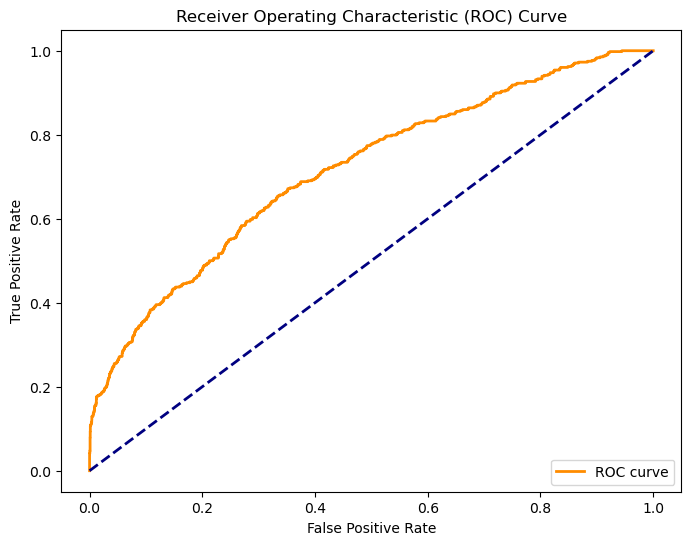

Confusion Matrix:
[[3798  704]
 [ 269  209]]


In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt

# Assuming test_y and test_pred are your true labels and predicted probabilities

# Convert probabilities to binary predictions (0 or 1)
test_pred_class = (test_pred > 0.5).astype(int)

# Calculate and print accuracy
accuracy = accuracy_score(test_y, test_pred_class)
print(f'Accuracy: {accuracy:.4f}')

# Calculate and print precision, recall, and F1 score
precision = precision_score(test_y, test_pred_class)
recall = recall_score(test_y, test_pred_class)
f1 = f1_score(test_y, test_pred_class)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Calculate and print ROC AUC
roc_auc = roc_auc_score(test_y, test_pred)
print(f'ROC AUC: {roc_auc:.4f}')

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(test_y, test_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print confusion matrix
conf_matrix = confusion_matrix(test_y, test_pred_class)
print('Confusion Matrix:')
print(conf_matrix)


In [61]:
#If the predicted probability (test_pred) is greater than 0.5, it is considered a prediction for the positive class (1). 
#The + 0 part is used to convert the resulting boolean values (True for values above 0.5 and False for values below) into integers (1 and 0, respectively)
test_pred_class = (test_pred > 0.5) + 0   # converts the predicted probabilities to binary predictions based on a threshold of 0.5.

# We sort the train_y values and select the mdedian (if is 0, then we select 0 otherwise 1). Then we generate that 0s or 1s equal to the lenght of test_y. We use this as baseline for test_pred_baseline
test_pred_baseline = np.repeat(np.median(train_y), len(test_y))   # This line creates a baseline prediction by repeating the median value of the training set's target variable. This serves as a simple baseline for comparison.

#compare the binary prediction (test_pred_class) with actual outcomes (test_y)
prediction_accuracy = np.mean((test_y == test_pred_class)) * 100    # calculates the accuracy of your model by comparing the predicted values (test_pred_class) with the true values (test_y).
baseline_accuracy = np.mean((test_y == test_pred_baseline)) * 100   # calculates the accuracy of the baseline by comparing the baseline predictions (test_pred_baseline) with the true values (test_y).

print("Prediction Accuracy:", round(prediction_accuracy, 1), "%")
print("Baseline Accuracy:", round(baseline_accuracy, 1), "%")

Prediction Accuracy: 80.5 %
Baseline Accuracy: 90.4 %


In [62]:
sm.delete_endpoint(EndpointName=xgboost_endpoint)

{'ResponseMetadata': {'RequestId': '2a85b420-c5c6-4fbb-b9b0-23f16d3516a9',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': '2a85b420-c5c6-4fbb-b9b0-23f16d3516a9',
   'content-type': 'application/x-amz-json-1.1',
   'content-length': '0',
   'date': 'Sun, 26 Nov 2023 22:14:34 GMT',
   'connection': 'close'},
  'RetryAttempts': 0}}